In [2]:
from tensorflow import keras # for building ANN and DL frameworks, 
import tensorflow as tf 
import matplotlib.pyplot as plt 



In [13]:
(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)
print(Xtrain.max(),Xtest.max())
# scaling of the data 
Xtrain = Xtrain/255
Xtest = Xtest / 255
print(Xtrain.max(),Xtest.max())


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
255 255
1.0 1.0


Text(0.5, 1.0, 'Label: 6')

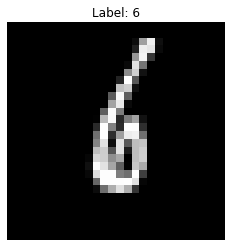

In [14]:
# visualise single image 
import numpy as np
samp = 1240
im = Xtrain[samp,:,:]
id = ytrain[samp]
plt.figure(1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Label: '+str(id))



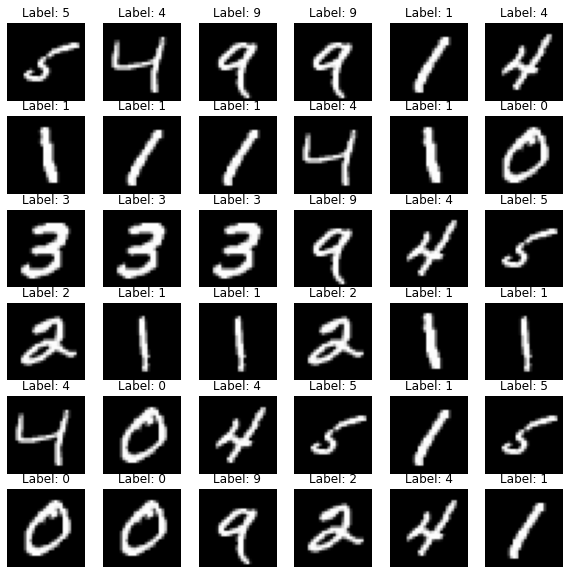

In [15]:
for i in range(36):
  samp = np.random.randint(1,12)
  im = Xtrain[samp,:,:]
  id = ytrain[samp]
  plt.figure(2,figsize=(10,10))
  plt.subplot(6,6,i+1)
  plt.imshow(im,cmap='gray')
  plt.axis('off')
  plt.title('Label: '+str(id))

In [24]:
#lets create the neural network 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28,1))) # input layer
model.add(keras.layers.Dense(250,activation = 'relu')) # hidden layer 1
model.add(keras.layers.Dense(150,activation = 'relu')) # hidden layer 2
model.add(keras.layers.Dense(300,activation = 'relu')) # hidden layer 3
model.add(keras.layers.Dense(10)) # output 


model.compile(optimizer='sgd',loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 250)               196250    
                                                                 
 dense_9 (Dense)             (None, 150)               37650     
                                                                 
 dense_10 (Dense)            (None, 300)               45300     
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 282,210
Trainable params: 282,210
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = model.fit(Xtrain,ytrain,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6331 - Accuracy: 0.8336
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2604 - Accuracy: 0.9250
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2004 - Accuracy: 0.9415
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1630 - Accuracy: 0.9523
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1373 - Accuracy: 0.9604
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1180 - Accuracy: 0.9658
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1031 - Accuracy: 0.9703
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - Accuracy: 0.9741
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0805 - Accuracy: 0.9770
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.072

In [18]:
[lossTest, testAcc] = model.evaluate(Xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - Accuracy: 0.9775


In [20]:
print(hist.epoch)
print(hist.history)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'loss': [0.6330956816673279, 0.26042425632476807, 0.2003726363182068, 0.16302090883255005, 0.13725470006465912, 0.11799339205026627, 0.10306961089372635, 0.0904003232717514, 0.08048497885465622, 0.0722152441740036, 0.06469453126192093, 0.05839560925960541, 0.0527583509683609, 0.047743190079927444, 0.043336231261491776, 0.03896996006369591, 0.035871416330337524, 0.0325562059879303, 0.029404543340206146, 0.02636222541332245], 'Accuracy': [0.8335666656494141, 0.9249666929244995, 0.9415000081062317, 0.9522666931152344, 0.9603666663169861, 0.965833306312561, 0.9703166484832764, 0.9741166830062866, 0.9769833087921143, 0.979533314704895, 0.9813166856765747, 0.9833666682243347, 0.9850333333015442, 0.9866333603858948, 0.9883000254631042, 0.9893333315849304, 0.9899166822433472, 0.9911333322525024, 0.9922833442687988, 0.993149995803833]}


Text(0, 0.5, 'Accuracy')

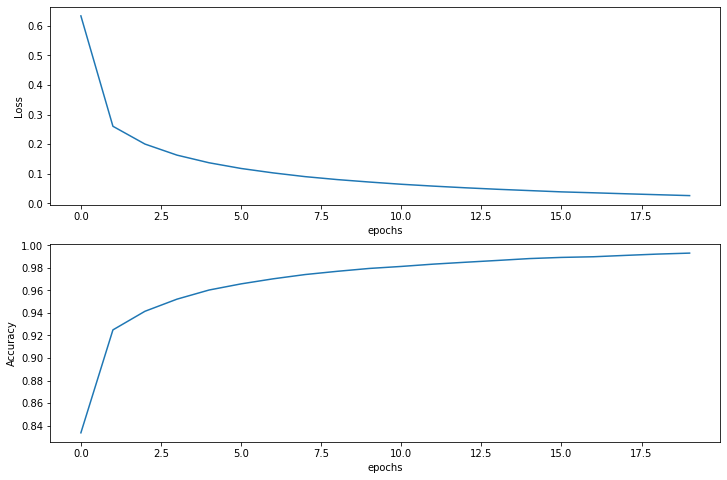

In [22]:
plt.figure(1,(12,8))
plt.subplot(2,1,1)
plt.plot(hist.epoch,hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.subplot(2,1,2)
plt.plot(hist.epoch,hist.history['Accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [25]:
hist = model.fit(Xtrain,ytrain,epochs=20,validation_data=(Xtest,ytest))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6065 - Accuracy: 0.8401 - val_loss: 0.2868 - val_Accuracy: 0.9146
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2531 - Accuracy: 0.9272 - val_loss: 0.2123 - val_Accuracy: 0.9380
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1966 - Accuracy: 0.9436 - val_loss: 0.1721 - val_Accuracy: 0.9494
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1629 - Accuracy: 0.9527 - val_loss: 0.1513 - val_Accuracy: 0.9552
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1397 - Accuracy: 0.9592 - val_loss: 0.1352 - val_Accuracy: 0.9587
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1222 - Accuracy: 0.9644 - val_loss: 0.1217 - val_Accuracy: 0.9623
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1073 - Accuracy: 0.9688 - val_loss: 0.1181 - val_Accuracy:

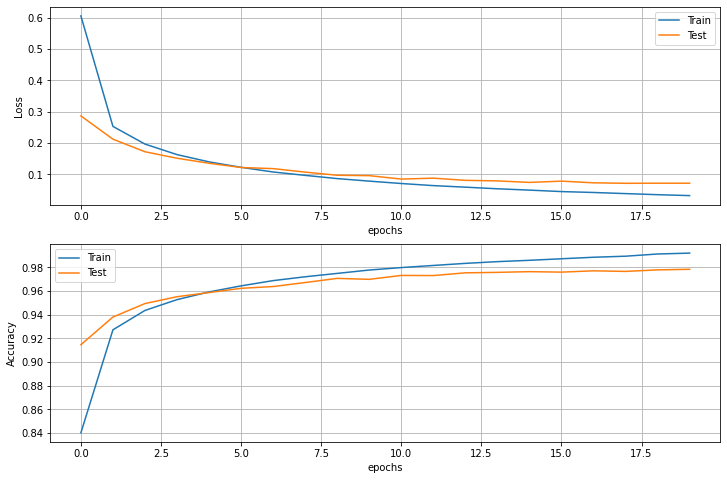

In [26]:
plt.figure(1,(12,8))
plt.subplot(2,1,1)
plt.plot(hist.epoch,hist.history['loss'],label='Train')
plt.plot(hist.epoch,hist.history['val_loss'],label='Test')
plt.legend()
plt.grid('on')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.subplot(2,1,2)
plt.plot(hist.epoch,hist.history['Accuracy'],label='Train')
plt.plot(hist.epoch,hist.history['val_Accuracy'],label='Test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid('on')